<a href="https://colab.research.google.com/github/anjaleeDS/Sandbox/blob/master/spacy_ner_satanic_bible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# NER Libraries
import spacy
from spacy import displacy
import pandas as pd
import altair as alt

# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [14]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive
%cd My\ Drive/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
/gdrive/My Drive


In [15]:
myfile = 'HistoryBayes.txt'
f = open(myfile, "rb")
text_read = f.read().decode(errors='replace')
# text_read = text.encode('ascii',errors='ignore')
text = str(text_read)
text = text.replace('\t','')
text = text.replace('\n','')
text = text.replace('\r','')

In [16]:
#close file for good practice
f.close()

In [ ]:
# print((text))
!python -m spacy download en_core_web_lg

# STOP AND RESTART RUNTIME


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
nlp = spacy.load('en_core_web_lg')
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)


In [ ]:
list_text = []
list_ent = []

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
    list_text.append(ent.text)
    list_ent.append(ent.label_)


Satanic 4 11 ORG
Anton Szandor LaVey 18 37 PERSON
The Black Pope 46 60 WORK_OF_ART
Anton LaVey 88 99 PERSON
only 16 years old 169 186 DATE
Saturday 226 234 DATE
night 235 240 TIME
half 271 275 CARDINAL
Sunday morning 321 335 TIME
the next Saturday night 573 596 TIME
the Christian Church 681 701 ORG
the last night of April 830 853 TIME
Walpurgisnacht 861 875 ORG
The Church Of Satan 1031 1050 ORG
The Satanic Bible 1289 1306 WORK_OF_ART
Anton Szandor LaVey 1307 1326 PERSON
Diane 1331 1336 PERSON
Bernadino Logara 1341 1357 PERSON
Karl Haushofer 1387 1401 PERSON
Rasputin 1433 1441 PERSON
Basil Zaharoff 1477 1491 PERSON
Cagliostro 1505 1515 ORG
Barnabas Saul 1525 1538 PERSON
Mount Lalesh 1554 1566 GPE
Ragnar Redbeard 1567 1582 PERSON
William Mortensen 1605 1622 PERSON
Hans Brick 1649 1659 PERSON
Max Reinhardt 1679 1692 PERSON
Orrin Klapp 1714 1725 PERSON
Fritz Lang 1743 1753 PERSON
Friedrich Nietzsche 1782 1801 PERSON
William Claude Dukinfield 1813 1838 PERSON
Tibet 1866 1871 GPE
Phineas Tay

In [ ]:
text_df = pd.DataFrame(list_text, columns=['text'])
text_df['ent'] = list_ent
text_df['cat'] = text_df.text+text_df.ent

text_df

,text,ent,cat
0,Satanic,ORG,SatanicORG
1,Anton Szandor LaVey,PERSON,Anton Szandor LaVeyPERSON
2,The Black Pope,WORK_OF_ART,The Black PopeWORK_OF_ART
3,Anton LaVey,PERSON,Anton LaVeyPERSON
4,only 16 years old,DATE,only 16 years oldDATE
...,...,...,...
3986,American,NORP,AmericanNORP
3987,Avon,ORG,AvonORG
3988,first,ORDINAL,firstORDINAL
3989,Richard F. Burton,PERSON,Richard F. BurtonPERSON


In [ ]:
!pip install squarify

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[]

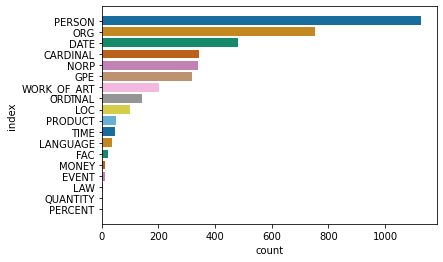

In [ ]:
#interested in the top N entities involved
def top_ents(entity, data_df, num):
  type_df = data_df[data_df.ent==entity]
  return(type_df.text.value_counts().head(num))

#what are the entities available?
devilpie = text_df.ent.value_counts()
devilpie = devilpie.to_frame(name='count').reset_index()

#let's just take the top 20
lilpie = devilpie[0:20]

#libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Reds")

ax = sns.barplot(data = lilpie, y='index', x='count',palette="colorblind")
# ax.set(xlabel="Entity Type")

plt.plot()

In [ ]:
#use the custom function and graph it!
temp = top_ents('MONEY', text_df, 10)

#make into df for graphing
temp_df = temp.to_frame(name='count').reset_index()

bars = alt.Chart(temp_df).mark_bar().encode(
    x='count:Q',
    y=alt.Y('index:N', sort='x'),
    tooltip=('index:N', 'count:Q')
).interactive()

bars.properties(height=900)

alt.Chart(...)

In [ ]:
#graph it ALL
bars = alt.Chart(text_df).mark_bar().encode(
    x='count(ent):Q',
    y=alt.Y('text:N', sort='x'),
    tooltip=('ent:N', 'count(ent):Q')
).interactive()


text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='ent:Q'
)

bars.properties(height=900)

alt.Chart(...)